### 📌 Project Overview:
This notebook demonstrates a handwritten digit sequence recognition system using TensorFlow. It takes images with multiple digits and predicts each digit in the sequence.

---

### 🔧 Technologies Used:
- Python
- TensorFlow / Keras
- OpenCV
- NumPy
- Matplotlib


In [38]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

In [39]:
# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [40]:
# Normalize and reshape
x_train = x_train / 255.0
x_test = x_test / 255.0
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

In [41]:
# Function to create sequences of digits
def create_digit_sequences(images, labels, seq_len=3):
    X_seq = []
    y_seq = []
    for i in range(len(images) - seq_len):
        seq_img = np.hstack([images[i + j].reshape(28, 28) for j in range(seq_len)])
        seq_img = seq_img.reshape(28, 28 * seq_len, 1)
        X_seq.append(seq_img)
        y_seq.append([labels[i + j] for j in range(seq_len)])
    return np.array(X_seq), np.array(y_seq)

In [42]:
# Create sequences
X_train_seq, y_train_seq = create_digit_sequences(x_train, y_train)
X_test_seq, y_test_seq = create_digit_sequences(x_test, y_test)

In [43]:

# Convert targets to integer class labels
y1 = y_train_seq[:, 0]
y2 = y_train_seq[:, 1]
y3 = y_train_seq[:, 2]

t1 = y_test_seq[:, 0]
t2 = y_test_seq[:, 1]
t3 = y_test_seq[:, 2]

### 🧠 Model Design:
We use a CNN to extract features and a Dense layer to output digit predictions in sequence (e.g., 3 digits per image).


In [44]:
# Model definition
input_layer = Input(shape=(28, 84, 1))
x = Conv2D(32, (3, 3), activation='relu')(input_layer)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Conv2D(64, (3, 3), activation='relu')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Flatten()(x)

out1 = Dense(10, activation='softmax', name='digit1')(x)
out2 = Dense(10, activation='softmax', name='digit2')(x)
out3 = Dense(10, activation='softmax', name='digit3')(x)

model = Model(inputs=input_layer, outputs=[out1, out2, out3])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy', 'accuracy', 'accuracy'])

In [45]:
# Train model
model.fit(X_train_seq, [y1, y2, y3],
          validation_data=(X_test_seq, [t1, t2, t3]),
          epochs=10, batch_size=64)

Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 160s 168ms/step - digit1_accuracy: 0.8328 - digit1_loss: 0.5121 - digit2_accuracy: 0.8379 - digit2_loss: 0.5122 - digit3_accuracy: 0.8339 - digit3_loss: 0.5229 - loss: 1.5472 - val_digit1_accuracy: 0.9790 - val_digit1_loss: 0.0631 - val_digit2_accuracy: 0.9768 - val_digit2_loss: 0.0709 - val_digit3_accuracy: 0.9783 - val_digit3_loss: 0.0677 - val_loss: 0.2027
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 154s 164ms/step - digit1_accuracy: 0.9823 - digit1_loss: 0.0585 - digit2_accuracy: 0.9826 - digit2_loss: 0.0597 - digit3_accuracy: 0.9805 - digit3_loss: 0.0635 - loss: 0.1817 - val_digit1_accuracy: 0.9821 - val_digit1_loss: 0.0510 - val_digit2_accuracy: 0.9843 - val_digit2_loss: 0.0456 - val_digit3_accuracy: 0.9831 - val_digit3_loss: 0.0470 - val_loss: 0.1444
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 206s 168ms/step - digit1_accuracy: 0.9898 - digit1_loss: 0.0344 - digit2_accuracy: 0.9898 - digit2_loss: 0.0344 - digit3_accuracy: 0.9890 - digit3_loss: 0.0

### ✅ Evaluation:
After training the model, we test it on new digit sequences and visualize the predictions to ensure accuracy.


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step


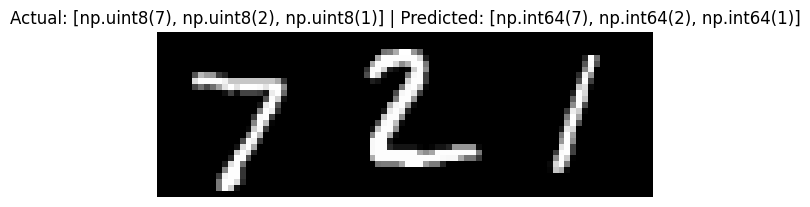

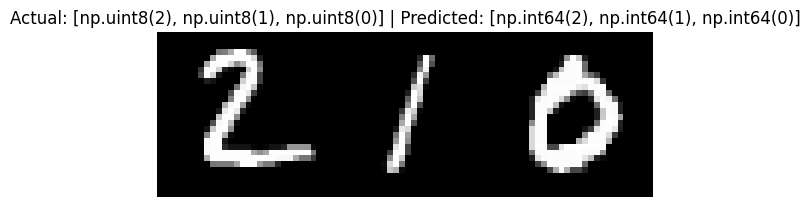

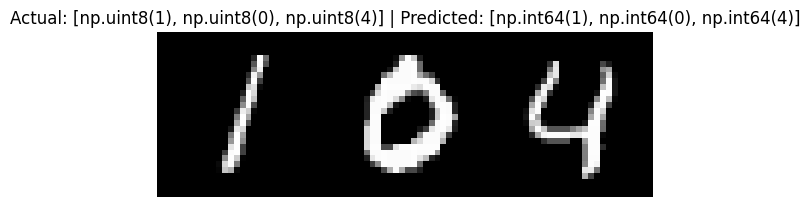

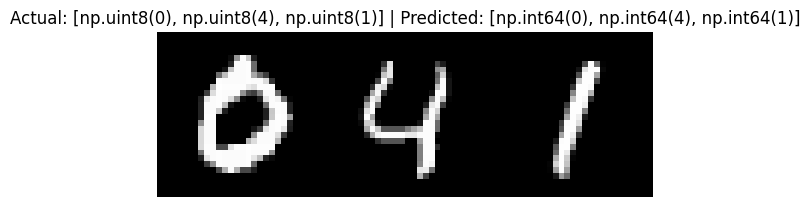

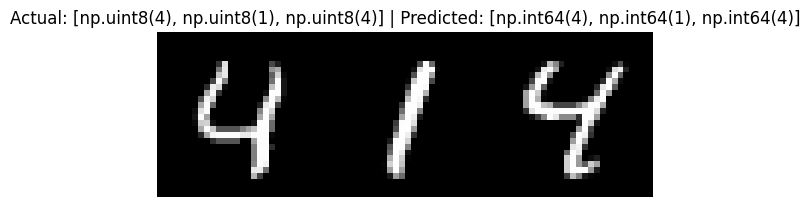

In [46]:
# Predict
preds = model.predict(X_test_seq[:5])

for i in range(5):
    img = X_test_seq[i].reshape(28, 84)
    actual = [t1[i], t2[i], t3[i]]
    pred = [np.argmax(preds[0][i]), np.argmax(preds[1][i]), np.argmax(preds[2][i])]

    plt.imshow(img, cmap='gray')
    plt.title(f"Actual: {actual} | Predicted: {pred}")
    plt.axis('off')
    plt.show()